<a href="https://colab.research.google.com/github/DariaRussanova/metody-comp-zrenia/blob/main/%D0%96%D0%B5%D0%BB%D1%82%D1%8B%D0%B9_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving желтый 2.jpg to желтый 2 (9).jpg
Центр контура: (155, 143)


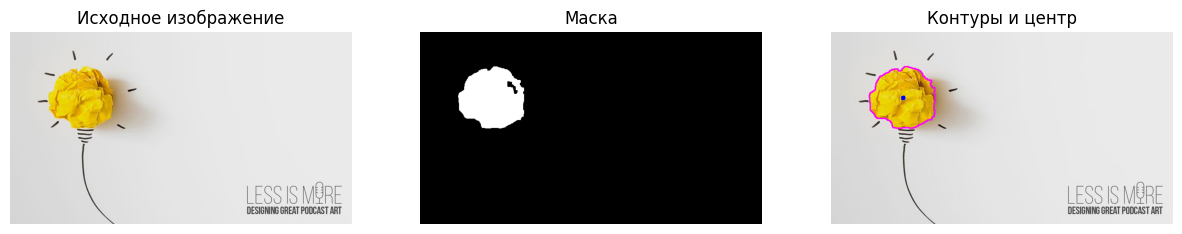

In [37]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Загружаем изображение
uploaded = files.upload()
image_path = next(iter(uploaded))

# Считываем кадр
frame = cv2.imread(image_path)
frame_1 = cv2.imread(image_path)

# Преобразуем в HSV
frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Создаем пороги
low_yellow = np.array([20, 110, 110])
high_yellow = np.array([40, 255, 255])

# Создаем маску
mask = cv2.inRange(frame_HSV, low_yellow, high_yellow)

# Применяем морфологические операции для удаления шума
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Закрытие
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Открытие

# Находим контуры
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(frame, contours, -1, (255, 0, 255), 2)

# Находим момент (moment) контура и рисуем центры
for contour in contours:
    area = cv2.contourArea(contour)  # Вычисляем площадь контура
    if area > 100:  # Фильтруем контуры по площади (можно настроить значение)
        M = cv2.moments(contour)

        if M["m00"] != 0:  # Проверяем, чтобы избежать деления на ноль
            # Вычисляем координаты центра
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Выводим координаты центра
            print(f"Центр контура: ({cX}, {cY})")

            # Рисуем центр на изображении
            cv2.circle(frame, (cX, cY), 5, (255, 0, 0), -1)  # Рисуем красный круг в центре на исходном изображении

# Отображаем изображения
plt.figure(figsize=(15, 5))  # Размер в дюймах

# Исходное изображение
plt.subplot(1, 3, 1)
plt.title('Исходное изображение')
plt.imshow(cv2.cvtColor(frame_1, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Маска
plt.subplot(1, 3, 2)
plt.title('Маска')
plt.imshow(mask, cmap='gray')
plt.axis('off')

# Изображение с контуром и центром
plt.subplot(1, 3, 3)
plt.title('Контуры и центр')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
